In [ ]:
# import lib
import tensorflow as tf
import numpy as np
import sys, os,cv2
from sklearn.utils import shuffle
from scipy.misc import imread,imresize
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from skimage.transform import resize
from imgaug import augmenters as iaa
import imgaug as ia
from scipy.ndimage import zoom
from sklearn.utils import shuffle

In [ ]:
# create data
n_examples, hidden_layer_dim = 100, 100
input_dim = 1000
X         = np.random.randn(n_examples, input_dim) # 100 examples of 1000 points
n_layers  = 20
layer_dim = [hidden_layer_dim] * n_layers # each one has 100 neurons

hs = [X]
zs = [X]
ws = []

In [9]:
# feed forward process 
for i in np.arange(n_layers):
    h = hs[-1] # get the input into this hidden layer
    W = np.random.normal(size = (layer_dim[i], h.shape[0])) * 0.01 # weight init: gaussian around 0
    z = np.dot(W, h)
    h_out = z * (z > 0)
    ws.append(W)
    zs.append(z)
    hs.append(h_out)

In [10]:
dLdh    = 100 * np.random.randn(hidden_layer_dim, input_dim) # random incoming grad into our last layer
h_grads = [dLdh] # store the incoming grads into each layer
w_grads = [] # store dL/dw for each layer

In [11]:
# the backwards pass
for i in np.flip(np.arange(1, n_layers), axis = 0):
	# get the incoming gradient
	incoming_loss_grad = h_grads[-1]
	# backprop through the relu
	print(incoming_loss_grad.shape)
	dLdz = incoming_loss_grad * (zs[i] > 0)
	# get the gradient dL/dh_{i-1}, this will be the incoming grad into the next layer
	h_grad = ws[i-1].T.dot(dLdz)
	# get the gradient of the weights of this layer (dL/dw)
	weight_grad = dLdz.dot(hs[i-1].T)
	h_grads.append(h_grad)
	w_grads.append(weight_grad)

(100, 1000)
(100, 1000)
(100, 1000)
(100, 1000)
(100, 1000)
(100, 1000)
(100, 1000)
(100, 1000)
(100, 1000)
(100, 1000)
(100, 1000)
(100, 1000)
(100, 1000)
(100, 1000)
(100, 1000)
(100, 1000)
(100, 1000)
(100, 1000)
(100, 1000)


variance of linear units before relu is 0.9944245247673164
variance of activations is 0.9944245247673164
ratio is 1.0
variance of linear units before relu is 0.010057925144155239


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


variance of activations is 0.00342197256186582
ratio is 2.939218524496639
variance of linear units before relu is 5.560938430343135e-05
variance of activations is 1.8031240077189225e-05
ratio is 3.0840576724271505
variance of linear units before relu is 2.530121100673569e-07
variance of activations is 8.839570536593905e-08
ratio is 2.8622669961164022
variance of linear units before relu is 1.3265240028188184e-09
variance of activations is 4.5808185585269497e-10
ratio is 2.895823062778954
variance of linear units before relu is 5.526433514470591e-12
variance of activations is 1.8296709879931636e-12
ratio is 3.0204520652820452
variance of linear units before relu is 2.7931590335096284e-14
variance of activations is 8.650634023584675e-15
ratio is 3.2288489212403313
variance of linear units before relu is 1.2485126232469915e-16
variance of activations is 3.781049731339013e-17
ratio is 3.302026452862459
variance of linear units before relu is 5.473749976567632e-19
variance of activations is

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


variance of linear units before relu is 1.5761953814744353e-46
variance of activations is 5.887385003265605e-47
ratio is 2.677241900436533


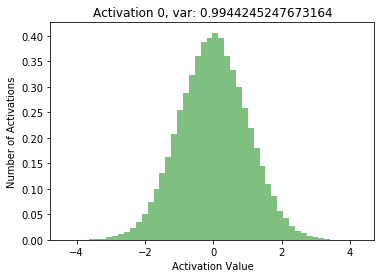

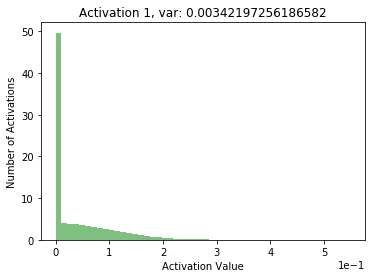

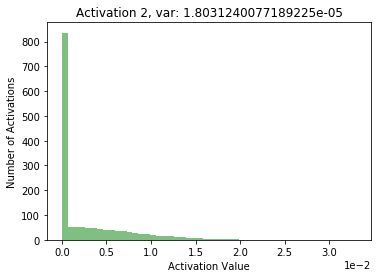

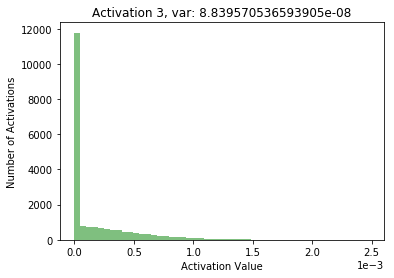

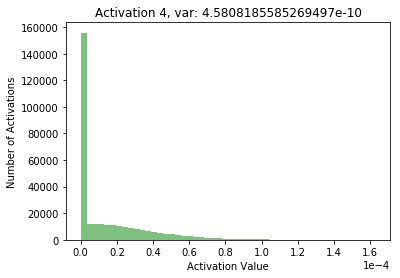

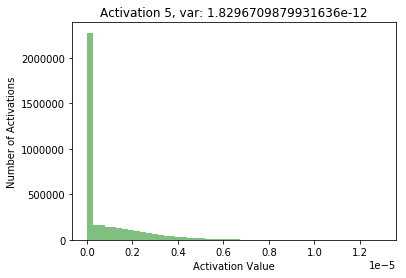

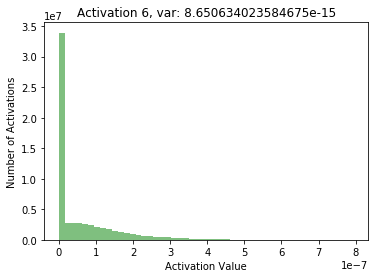

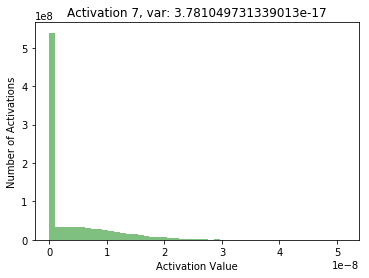

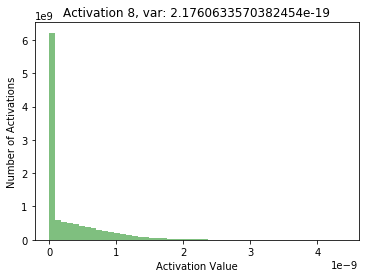

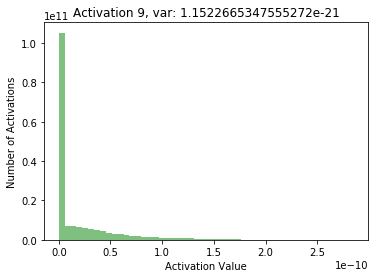

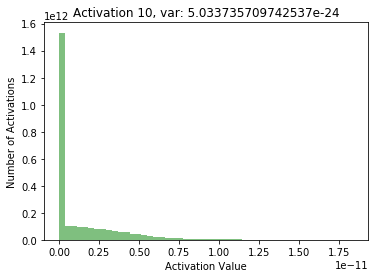

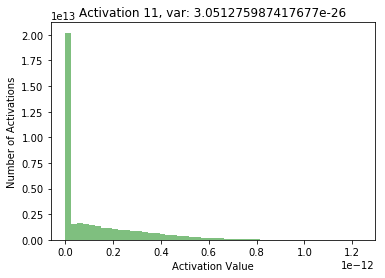

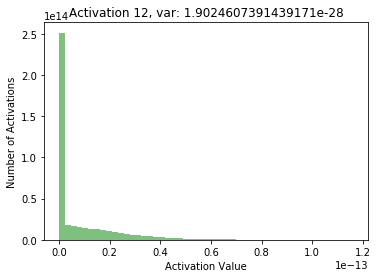

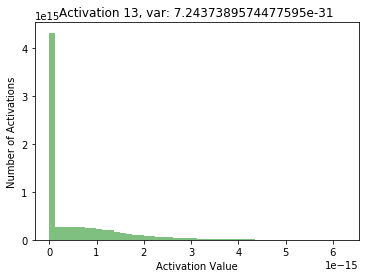

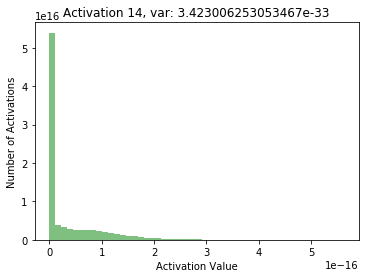

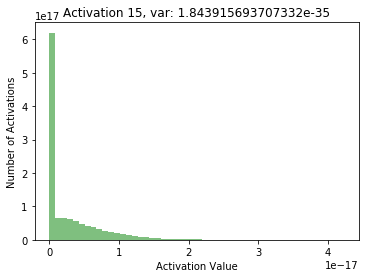

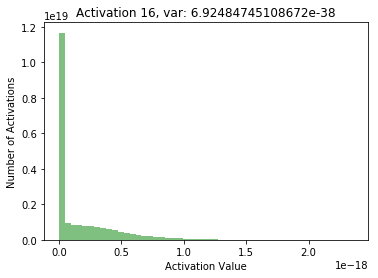

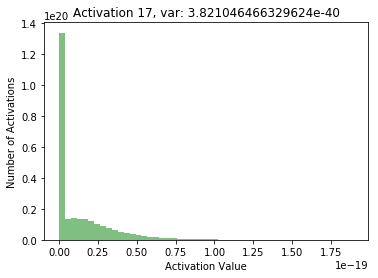

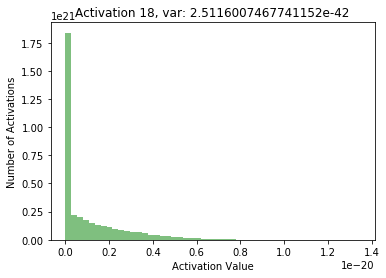

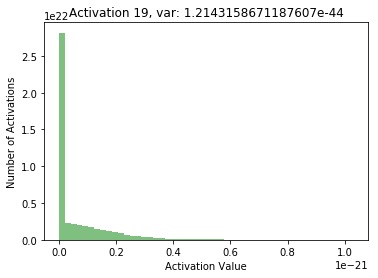

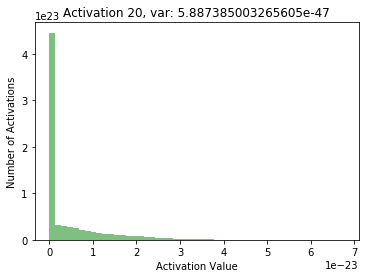

In [14]:
# plot the resulting activatiosn
for i, activation in enumerate(hs):
	fig = plt.figure()
	num_bins = 50
	print('variance of linear units before relu is {}'.format(np.var(zs[i].ravel())))
	print('variance of activations is {}'.format(np.var(activation.ravel())))
	ratio = np.var(zs[i].ravel()) / np.var(activation.ravel())
	print('ratio is {}'.format(ratio))
	n, bins, patches = plt.hist(activation.ravel(), num_bins, normed=1, facecolor='green', alpha=0.5)
	plt.title('Activation {}, var: {}'.format(i, np.var(activation.ravel())))
	plt.xlabel('Activation Value')
	plt.ylabel('Number of Activations')
	plt.subplots_adjust(left=0.15)
	plt.savefig('activation-plots/act-{}.png'.format(i))	
	plt.ticklabel_format(axis='x',style='sci',scilimits=(1,4))

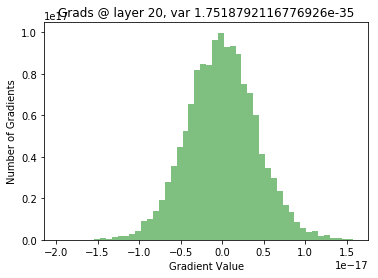

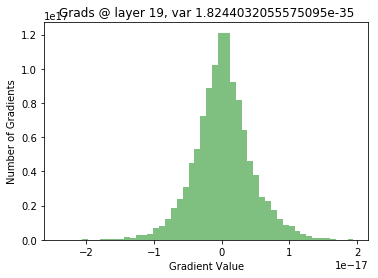

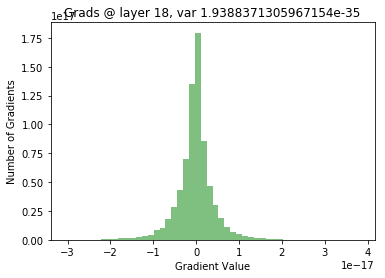

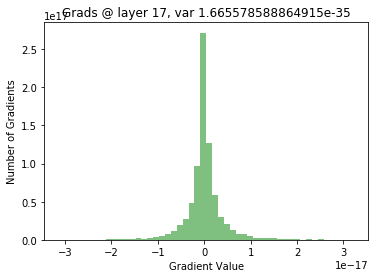

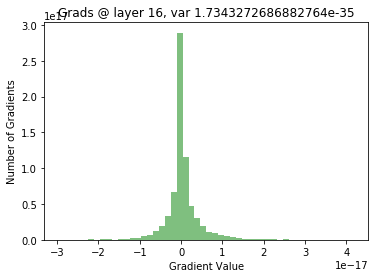

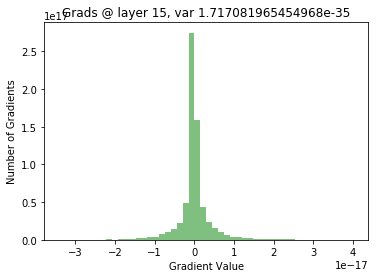

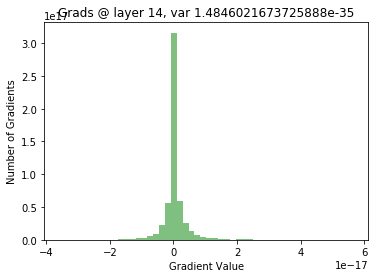

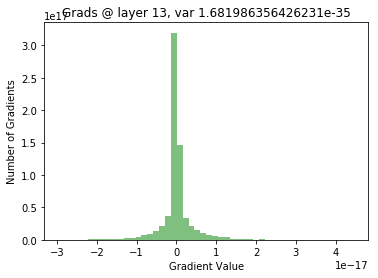

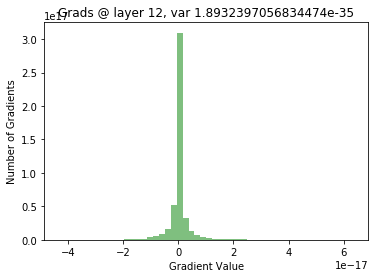

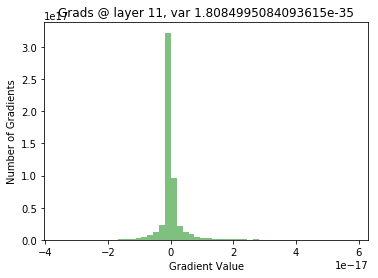

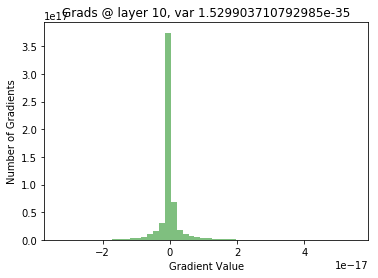

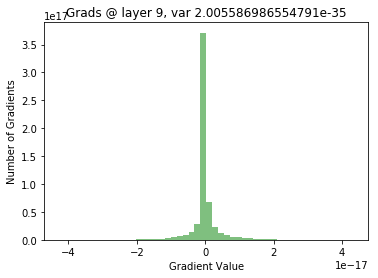

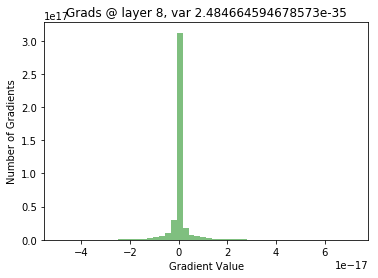

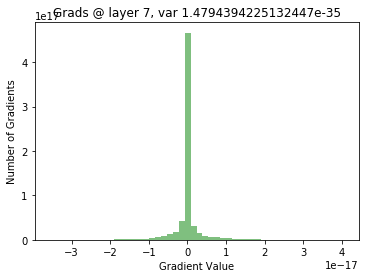

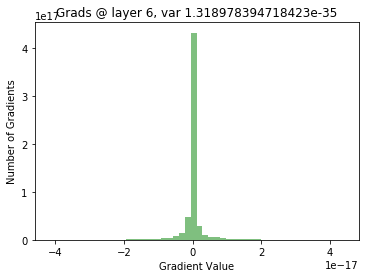

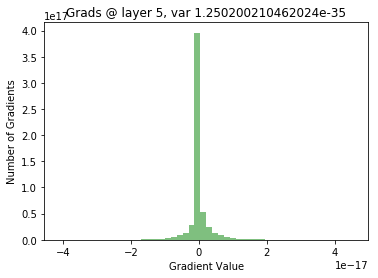

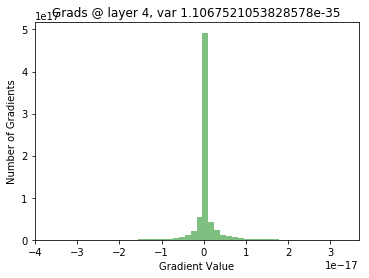

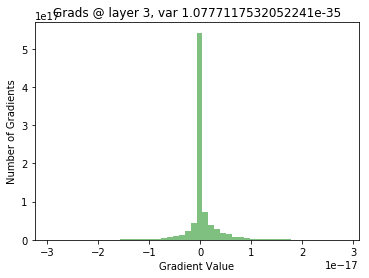

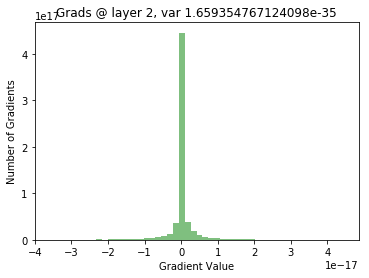

In [17]:
w_grads = list(reversed(w_grads))
for i, grad in enumerate(w_grads):
	fig = plt.figure()
	num_bins = 50
	n, bins, patches = plt.hist(grad.ravel(), num_bins, normed=1, facecolor='green', alpha=0.5)
	plt.title('Grads @ layer {}, var {}'.format(n_layers - i, np.var(grad.ravel())))
	plt.xlabel('Gradient Value')
	plt.ylabel('Number of Gradients')
	plt.subplots_adjust(left=0.15)
	plt.savefig('gradient-plots/grad-{}.png'.format(i))	
	plt.ticklabel_format(axis='x',style='sci',scilimits=(1,4))

<h1> 
    What we can see from above is the fact that, gradient is almost zero. 
    <br/> 
    Is the fact that gradients that are near zero this means that none of the weights are getting "proper" updates. 
    And this is a problem. Why? Since the weights are not getting any gradient updates, the whole process of training, is dependent on the gradient.
    That is coming into the weigths. 

</h1>

In [20]:
! git add .
! git commit -m "from mac"
! git push

[master 5b09d427] from mac
 2 files changed, 489 insertions(+), 72 deletions(-)
Counting objects: 6, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (6/6), done.
Writing objects: 100% (6/6), 169.64 KiB | 7.38 MiB/s, done.
Total 6 (delta 5), reused 0 (delta 0)
remote: Resolving deltas: 100% (5/5), completed with 5 local objects.
To https://github.com/JaeDukSeo/Daily-Neural-Network-Practice-2
   748efbf3..5b09d427  master -> master
